**ids-pdl08-hwk.ipynb**: This Jupyter notebook is provided by Joachim Vogt for the _Python Data Lab_ of the module _Introduction to Data Science_ offered in Fall 2022 at Jacobs University Bremen. Module instructors are Hilke Brockmann, Adalbert Wilhelm, and Joachim Vogt. Jupyter notebooks and other learning resources are available from a dedicated _module platform_.

# Homework assignments: Pandas basics

The homework assignments in this notebook supplement the tutorial *Pandas basics*.

- Solve the assignments according to the instructions.
- Upload the completed notebook to the module platform.
- Do not forget to enter your name in the markdown cell below.

The homework set carries a total of 20 points. Square brackets in the assignment titles specify individual point contributions.

## Name: Shayan Ali Khan

---
---

## Preparation

Import NumPy, `pyplot` from matplotlib, and Pandas as usual.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

The following data file is expected to reside in the working directory. Identify the file on the module platform and upload it to the same folder as this Jupyter notebook.

- `gdp-per-capita-in-us-dollar-world-bank.csv`: GDP per capita in constant 2010 US dollars 1960-2020, published by the [World Bank, 2021-07-30](http://data.worldbank.org/data-catalog/world-development-indicators), available from [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-in-us-dollar-world-bank).

## Assignment:  Pandas Series [6]

According to [Wikipedia (accessed on 2022-07-26)](https://de.wikipedia.org/wiki/Liste_der_Gro%C3%9F-_und_Mittelst%C3%A4dte_in_Deutschland), the resident numbers of Berlin, Cologne, Hamburg, Munich in the years 1980, 2000, 2020/21 were as follows.

| City     | 1980    | 2000    | 2020/21 |
|:---------|:-------:|:-------:|:-------:|
| Berlin   | 3048759 | 3382169 | 3677472 | 	
| Cologne  |  976694 |  962884 | 1073096 |
| Hamburg  | 1645095 | 1715392 | 1853935 |
| Munich   | 1298941 | 1210223 | 1487708 |

In the cell below, store the three sets of resident numbers for the years 1980, 2000, 2020/21 in Pandas Series `ser1980`, `ser2000`, `ser2020`, respectively, and complete the code according to the instructions given as comments.

In [17]:
### Construct ser1980 from a dictionary.
ser1980 = pd.Series({'Berlin':3048759, 'Cologne':976694, 'Hamburg':1645095, 'Munich':1298941})
print('Residents in the year 1980:')
print(ser1980)
### Construct ser2000 using a list of resident numbers and a separate index array.
#cities = ['Berlin', 'Cologne', 'Hamburg','Munich']
ser2000 = pd.Series([3382169, 962884, 1715392, 1210223],index=['Berlin', 'Cologne', 'Hamburg','Munich'])
print('\nResidents in the year 2000:')
print(ser2000)
### Copy ser2000 to initialize ser2020, and then re-assign the four values.
ser2020 = ser2000.copy()
ser2020['Berlin'] = 3677472
ser2020['Cologne'] = 1073096
ser2020['Hamburg'] = 1853935
ser2020['Munich'] = 1487708
print('\nResidents in the year 2020/21:')
print(ser2020)
### Compute the change from 1980 to 2000 and store in serdiff1.
serdiff1 = 100*(ser2000 - ser1980)/ser1980
print('\nPercentage change in resident number from 1980 to 2000:')
print(serdiff1)
### Compute the percentage change from 1990 to 2010 and store in serdiff2.
serdiff2 = 100*(ser2020 - ser2000)/ser2000
print('\nPercentage change in resident number from 2000 to 2020/21:')
print(serdiff2)

Residents in the year 1980:
Berlin     3048759
Cologne     976694
Hamburg    1645095
Munich     1298941
dtype: int64

Residents in the year 2000:
Berlin     3382169
Cologne     962884
Hamburg    1715392
Munich     1210223
dtype: int64

Residents in the year 2020/21:
Berlin     3677472
Cologne    1073096
Hamburg    1853935
Munich     1487708
dtype: int64

Percentage change in resident number from 1980 to 2000:
Berlin     10.935925
Cologne    -1.413954
Hamburg     4.273127
Munich     -6.830025
dtype: float64

Percentage change in resident number from 2000 to 2020/21:
Berlin      8.731172
Cologne    11.446031
Hamburg     8.076463
Munich     22.928419
dtype: float64


## Assignment: Pandas DataFrame [6]

Complete the code according to the instructions given as comments.

In [18]:
### Initialize (seed) the random number generator.
np.random.seed(42)
### Define a Pandas DataFrame with columns 'm' and 'n'.
df = pd.DataFrame({'m':np.random.randint(20,100,size=5),
                   'n':np.random.randint(2,10,size=5)},
                  index=list('pqrst'))
### Add a new column 'm+n' with the sum of the columns 'm' and 'n'.
df['m+n'] = df['m'] + df['n']
### Add a new column 'm-n' with the difference of first two columns 'm' and 'n'.
df['m-n'] = df['m'] - df['n']
### Add a new column 'm//n' with the integer division of the columns 'm' and 'n'.
df['m/n'] = df['m'] / df['n']
### Add a new column 'm%n' with the modulo of first two columns 'm' and 'n'.
df['m%n'] = df['m'] % df['n']
### Display the resulting DataFrame.
display(df)
### Using .loc, extract (and display) the column labeled 'm-n'.
display(df.iloc[:,3])
### Using .iloc, extract  (and display) the row labeled 's'.
display(df.iloc[3,:])
### Using .loc, extract the sub-array with columns 'm+n','m//n' and rows 'q','r','s'.
display(df.loc['q':'s',['m+n','m/n']])
### Using .iloc, extract the sub-array with columns 'm-n','m//n','m%n' and rows 'r','t'.
display(df.iloc[[2,4],3:6])
### Using .drop(), remove the rows 'q' and 's' and re-display the DataFrame.
df.drop('q',inplace=True)
df.drop('s',inplace=True)
display(df)

,m,n,m+n,m-n,m/n,m%n
p,71,8,79,63,8.875000,7
q,34,3,37,31,11.333333,1
r,91,4,95,87,22.750000,3
s,80,8,88,72,10.000000,0
t,40,4,44,36,10.000000,0


p    63
q    31
r    87
s    72
t    36
Name: m-n, dtype: int32

m      80.0
n       8.0
m+n    88.0
m-n    72.0
m/n    10.0
m%n     0.0
Name: s, dtype: float64

,m+n,m/n
q,37,11.333333
r,95,22.750000
s,88,10.000000


,m-n,m/n,m%n
r,87,22.75,3
t,36,10.00,0


,m,n,m+n,m-n,m/n,m%n
p,71,8,79,63,8.875,7
r,91,4,95,87,22.750,3
t,40,4,44,36,10.000,0


## Assignment: GDP per capita 1960-2020 [8]

The file `gdp-per-capita-in-us-dollar-world-bank.csv` contains data on GDP per capita in constant 2010 US dollars 1960-2020, as published by the [World Bank on 2021-07-30](http://data.worldbank.org/data-catalog/world-development-indicators), and made available through [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-in-us-dollar-world-bank).

- Click on the filename in the directory listing to display the content of this comma-separated text file to study the structure.
- Consult the associated tutorial notebook `ids-pdl08-tut.ipynb`, revisit the section *Tabular data on life expectancy at birth 1960-2019*, and study how the data from the file `life-expectancy-at-birth-total-years.csv` are processed.
- The same processing steps are to be applied to the GDP per capita data from the file `gdp-per-capita-in-us-dollar-world-bank.csv`. Details are given below.

Using the Pandas function `read_csv()`, the data are loaded and stored in a DataFrame.

In [21]:
gdp_full = pd.read_csv('gdp-per-capita-in-us-dollar-world-bank.csv')

The data for Australia (Code: AUS) are identified through a boolean array.

In [22]:
aus = gdp_full['Code'] == 'AUS'

A new DataFrame with the GDP per capita data for Australia is created and displayed.

In [23]:
gdp = pd.DataFrame({'Year':gdp_full[aus].iloc[:,2].values, 'GDP[AUS]':gdp_full[aus].iloc[:,3].values})
display(gdp)

,Year,GDP[AUS]
0,1960,19378.325276
1,1961,19468.768300
2,1962,19245.605752
3,1963,20053.351027
4,1964,21035.902692
...,...,...
56,2016,55728.682255
57,2017,56058.465951
58,2018,56832.050482
59,2019,57183.379348


The data for Brazil (BRA), China (CHN), France (FRA), Nigeria (NGA), and the United States (USA) are added to the DataFrame using the Pandas function `merge()`, operating on the common `Year` column.

*Note on computational efficiency*: This assignment is meant to illustrate DataFrame building using the methods introduced in the context of the associated tutorial. More efficient Pandas tools exist, e.g., the `groupby()` method.

In [24]:
Codes = ['BRA', 'CHN', 'FRA', 'NGA', 'USA']
for code in Codes:
    ind = gdp_full['Code'] == code
    gdp = gdp.merge(pd.DataFrame({'Year':gdp_full[ind].iloc[:,2].values, 'GDP['+code+']':gdp_full[ind].iloc[:,3].values}))

display(gdp)

,Year,GDP[AUS],GDP[BRA],GDP[CHN],GDP[FRA],GDP[NGA],GDP[USA]
0,1960,19378.325276,3417.352016,191.957204,12743.919906,1360.418938,17578.137317
1,1961,19468.768300,3660.391745,141.035481,13203.325606,1335.654012,17686.791509
2,1962,19245.605752,3740.433231,132.077606,13911.254467,1361.888280,18479.278156
3,1963,20053.351027,3664.978064,142.144897,14572.273052,1447.838085,19016.705818
4,1964,21035.902692,3685.492846,164.133285,15337.079930,1487.497210,19842.135246
...,...,...,...,...,...,...,...
56,2016,55728.682255,10965.974368,6908.109134,42140.036880,2443.440750,52746.472856
57,2017,56058.465951,11021.718581,7346.836564,42980.729961,2399.732051,53636.475383
58,2018,56832.050482,11130.718972,7807.057809,43631.404294,2383.420479,54953.615152
59,2019,57183.379348,11203.274947,8242.054643,44192.814620,2374.369383,55886.184211


Plot the GDP per capita time series for all selected countries.

Text(0, 0.5, 'GDP')

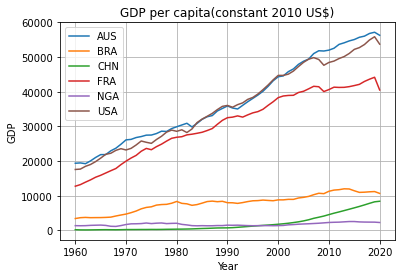

In [25]:
Codes.insert(0,'AUS')

for code in Codes:
    plt.plot(gdp['Year'],gdp['GDP['+code+']'],label=code)
plt.legend(loc='upper left')
plt.grid()
plt.title('GDP per capita(constant 2010 US$)')
plt.xlabel('Year')
plt.ylabel('GDP')

Using the function `pairplot()` from the Seaborn module, univariate and bivariate statistical distributions are visualized in a matrix showing histograms on the main diagonal and scatter plots otherwise.

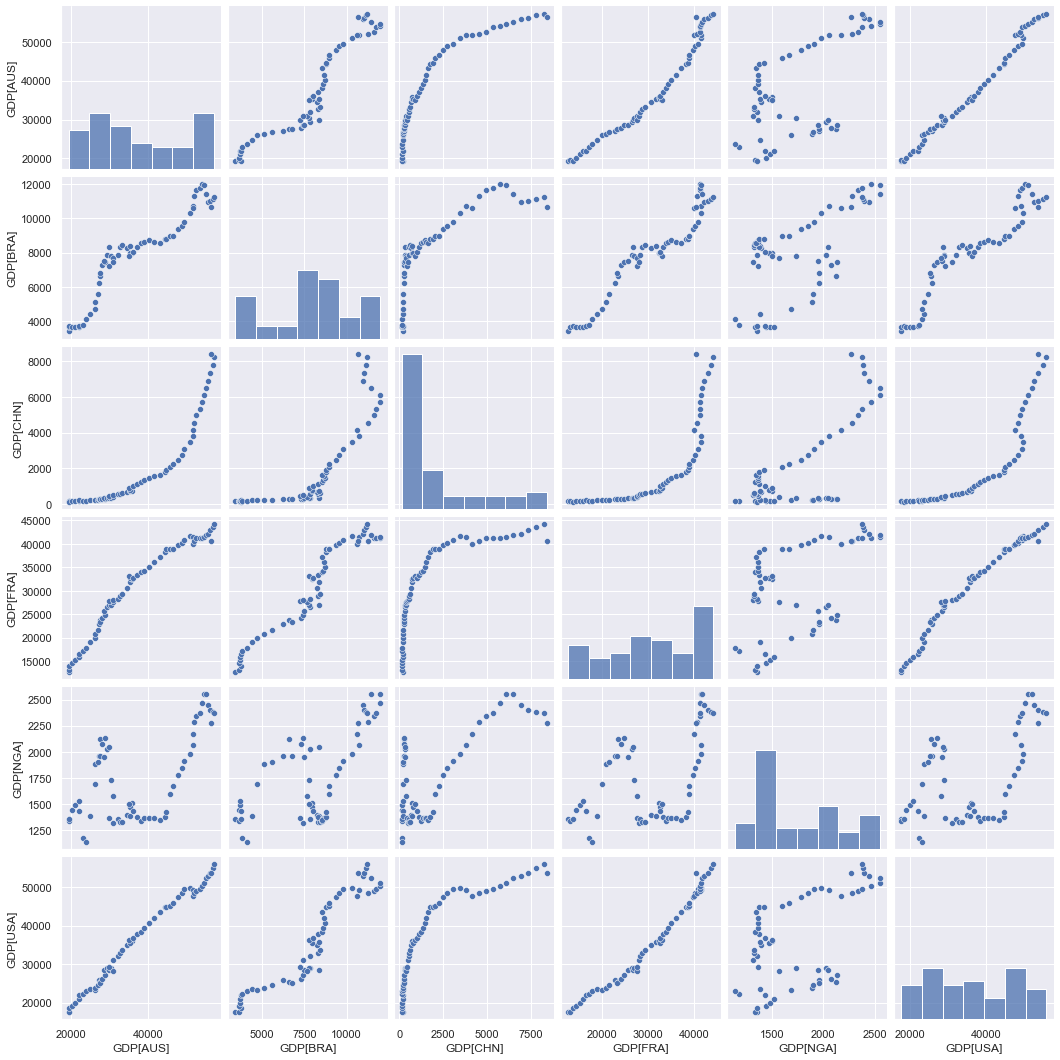

In [26]:
import seaborn as sns
sns.set()
sns.pairplot(gdp.iloc[:,1:])

The function `describe()` is called to obtain basic statistics of the numerical data in the DataFrame.

In [27]:
gdp.describe()

,Year,GDP[AUS],GDP[BRA],GDP[CHN],GDP[FRA],GDP[NGA],GDP[USA]
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000
mean,1990.000000,37339.463438,7981.834083,1979.431575,30768.545955,1746.621022,36207.438009
std,17.752934,11979.852613,2482.447608,2412.012527,9439.640627,410.238243,11607.396636
min,1960.000000,19245.605752,3417.352016,132.077606,12743.919906,1139.819936,17578.137317
25%,1975.000000,27513.815704,6805.298034,263.458488,23654.183679,1376.418432,25794.128163
50%,1990.000000,35190.164729,8311.560836,729.282386,32524.048134,1598.819582,35793.896503
75%,2005.000000,48813.916412,9535.418574,2732.266178,40058.682856,2061.419017,47648.813250
max,2020.000000,57183.379348,11993.483925,8405.180473,44192.814620,2550.469949,55886.184211


---
---